<Figure size 360x360 with 0 Axes>

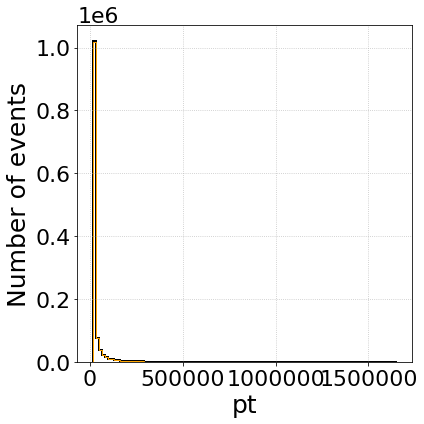

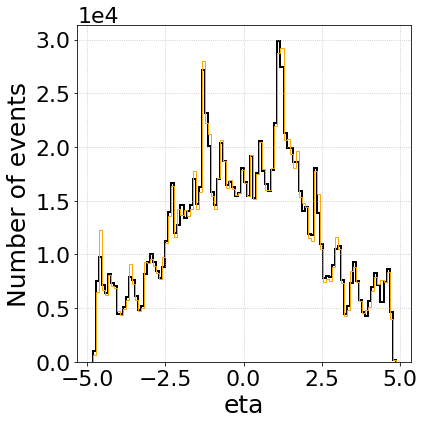

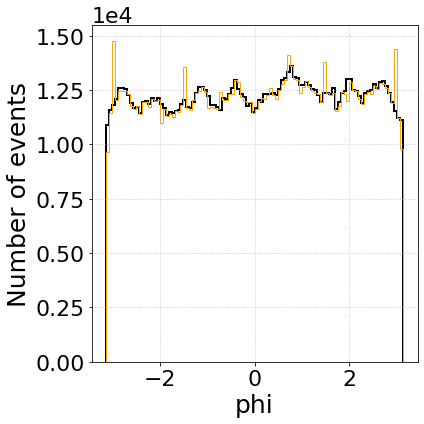

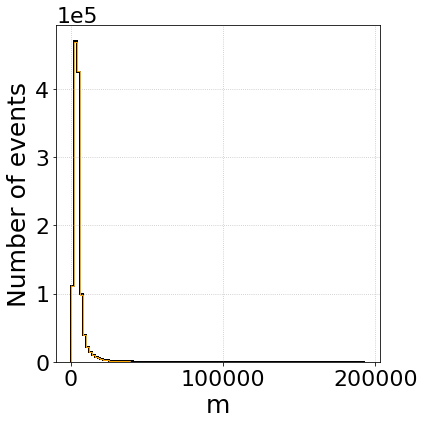

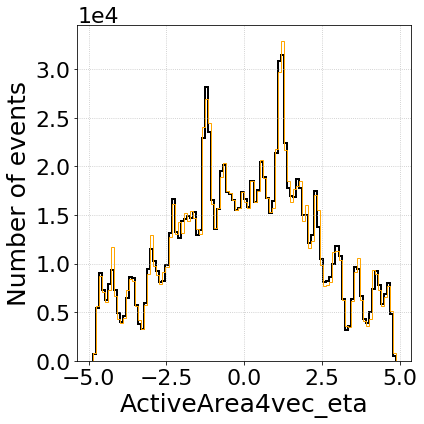

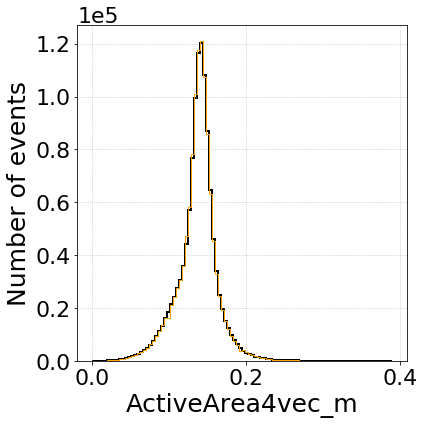

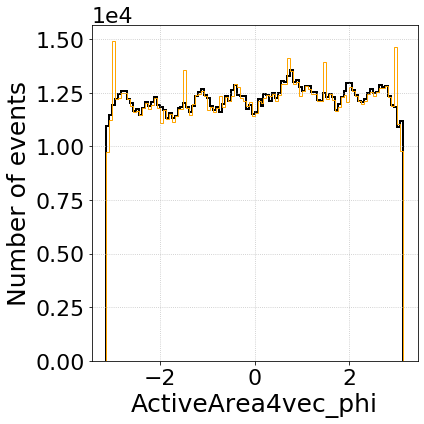

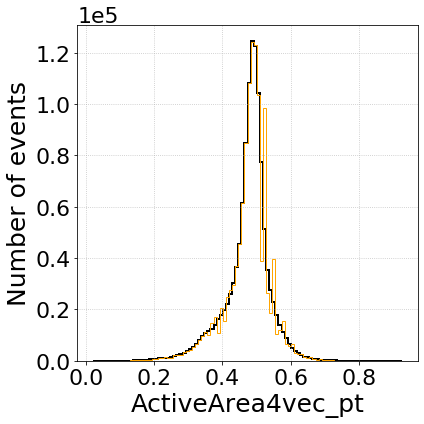

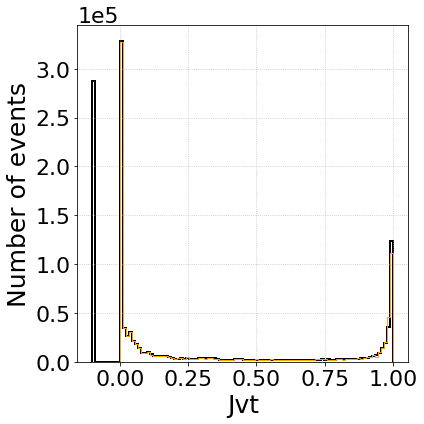

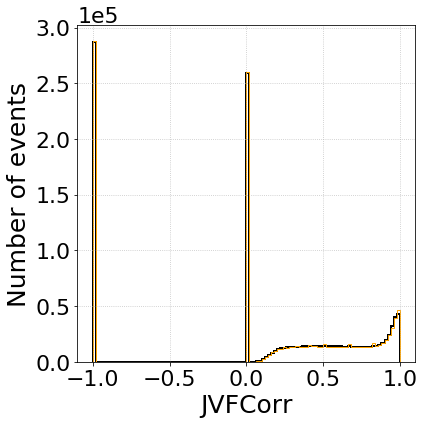

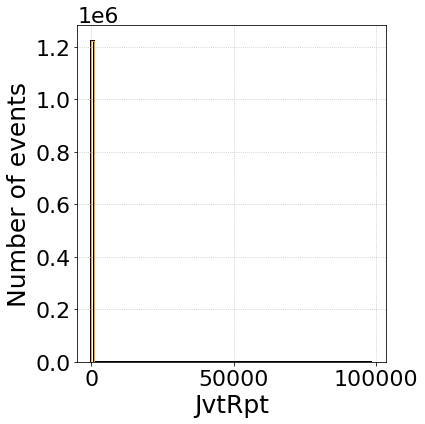

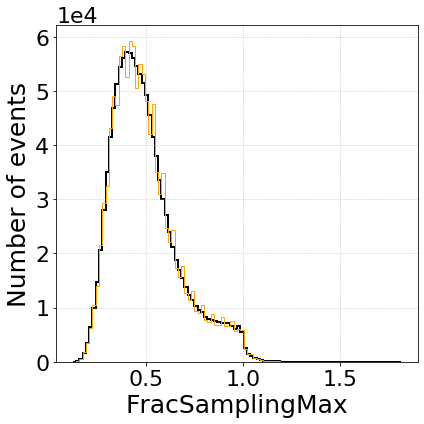

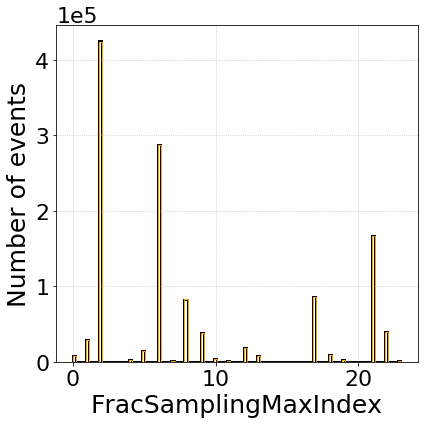

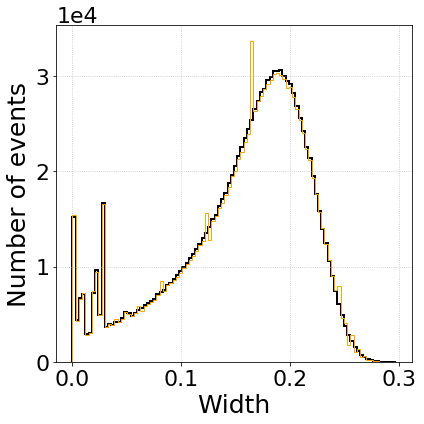

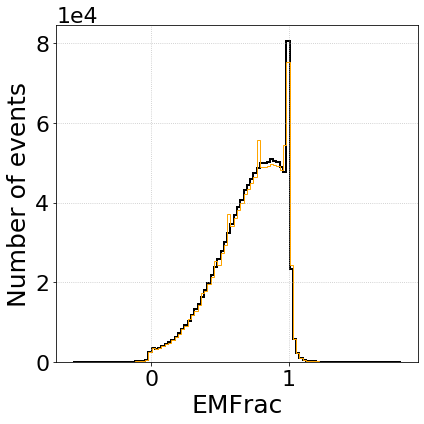

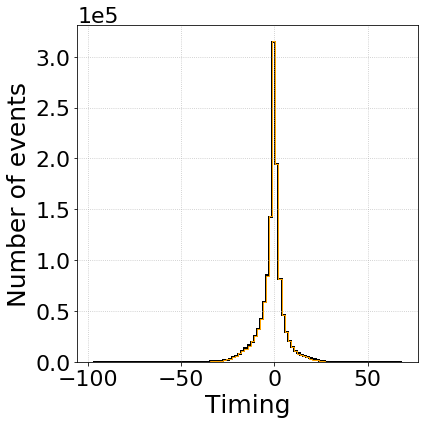

In [1]:

import sys
BIN = '../../'
sys.path.append(BIN)
import utils
import matplotlib.pyplot as plt
from scipy import stats
import my_matplotlib_style as ms

%matplotlib inline

%matplotlib inline
import sys
BIN = '../../'
sys.path.append(BIN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
#import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import my_matplotlib_style as ms

from fastai import data_block, basic_train, basic_data
from fastai.callbacks import ActivationStats
import fastai

import matplotlib as mpl
mpl.rc_file(BIN + 'my_matplotlib_rcparams')

from nn_utils import AE_big, AE_3D_200
from utils import plot_activations


# Load data
train = pd.read_pickle(BIN + 'processed_data/aod/uncompressed_all_jets_train.pkl')
test = pd.read_pickle(BIN + 'processed_data/aod/uncompressed_all_jets_test.pkl')

trainc = pd.read_pickle(BIN + 'processed_data/aod/compressed_all_jets_train.pkl')
testc = pd.read_pickle(BIN + 'processed_data/aod/compressed_all_jets_test.pkl')

branches = ['pt','eta','phi','m'] + ["ActiveArea4vec_eta", "ActiveArea4vec_m", "ActiveArea4vec_phi", "ActiveArea4vec_pt", "Jvt", "JVFCorr" ,"JvtRpt", "FracSamplingMax", "FracSamplingMaxIndex", "Width", "EMFrac","Timing"]


%matplotlib inline
n_bins = 100
alph = 0.8
#for kk in np.arange(4):
for kk in range(16):
    plt.figure(kk + 4, figsize=(5,5))
    plt.figure(figsize=(6,6))
    #plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    n_hist_data, bin_edges, _ = plt.hist(train[branches[kk]], color='black', label='Input', alpha=1, bins=n_bins,histtype="step",linewidth=2)
    n_hist_datac, _, _ = plt.hist(trainc[branches[kk]], color='orange', label='Compressed Input', alpha=1, bins=bin_edges,histtype="step")
    #n_hist_pred, _, _ = plt.hist(pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    #plt.suptitle(branches[kk])
    plt.xlabel(branches[kk])
    plt.ylabel('Number of events')
    ms.sciy()
    #plt.xlim(-5, 10)
    # plt.yscale('log')
    #plt.legend(loc=4)
    fig_name = 'trainforever_hist_%s' % train.columns[kk]
    plt.tight_layout()
    plt.savefig("floatcompression_overlaidinput_"+branches[kk])